Nombre Edi Tomas
Serie 1

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('https://drive.google.com/file/d/113qPosB6rPsOMHGYpq_lTmBxGMA0dB1K/view')

data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

#print(data)
# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['C']  # Objetivo: A

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar la predicción para correlativo 20
correlativo_20 = [[20]]
prediccion = model.predict(correlativo_20)

# Imprimir la predicción con 2 decimales sin aproximar
print(f'Predicción para correlativo 30: {prediccion[0]:.2f}')




Predicción para correlativo 30: 286.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


RMSE:  11.605327930034397
R2:  0.992597131913281


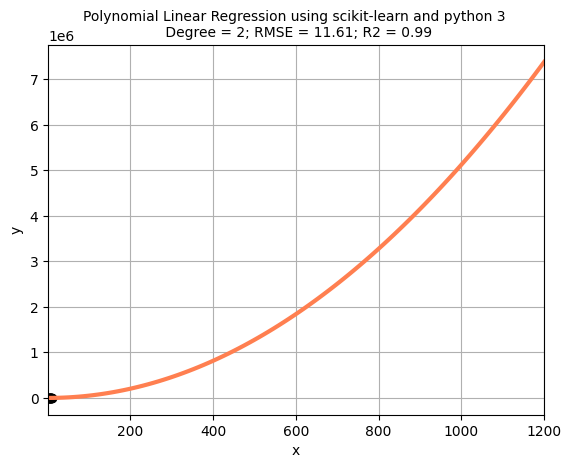

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')


x = np.asarray(df['NO']).reshape(-1,1)
y = df['B']
#print(x)
#print(y)
nb_degree = 2

polynomial_features = PolynomialFeatures(degree = nb_degree)
#print(X)
X_TRANSF = polynomial_features.fit_transform(x)

#----------------------------------------------------------------------------------------#
# Step 3: define and train a model

model = linear_model.LinearRegression()

model.fit(X_TRANSF, y)

#----------------------------------------------------------------------------------------#
# Step 4: calculate bias and variance

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)


#----------------------------------------------------------------------------------------#
# Step 5: prediction

x_new_min = 1.0
x_new_max = 1200.0

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)


Y_NEW = model.predict(X_NEW_TRANSF)

#Y_NEW =Y_NEW+Y_NEW*np.sin(Y_NEW)

#print(Y_NEW)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
#plt.ylim(0,600000)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['A']  # Objetivo: C

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar las predicciones utilizando el modelo entrenado
predicciones = model.predict(X)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y, predicciones)

# Imprimir el coeficiente de determinación con 2 decimales sin redondear
print(f'Coeficiente de determinación para el atributo A: {r2:.2f}')

Coeficiente de determinación para el atributo A: 0.01


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargar el archivo pred.csv en un DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['A']  # Objetivo: C

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener el coeficiente de regresión
coeficiente = model.coef_

# Imprimir el coeficiente de regresión con 2 decimales sin redondear
print(f'Coeficiente de regresión para el atributo A: {coeficiente[0]:.2f}')

Coeficiente de regresión para el atributo A: 0.03


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el archivo pred.csv en un DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['C']  # Objetivo: A

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar las predicciones utilizando el modelo entrenado
predicciones = model.predict(X)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, predicciones)

# Imprimir el error cuadrático medio con 2 decimales sin redondear
print(f'Error cuadrático medio para el atributo C: {mse:.2f}')

Error cuadrático medio para el atributo C: 7615.26


In [ ]:
import random

def binary_to_decimal(binary):
    decimal = 0
    for bit in binary:
        decimal = decimal * 2 + int(bit)
    return decimal

def decimal_to_binary(decimal):
    binary = bin(decimal)[2:]
    return binary.zfill(5)  # Asumiendo que los números en binario tienen 5 bits

def evaluate_fitness(individual):
    x = binary_to_decimal(individual)
    return 25*x - x**2

def tournament_selection(population):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    return parent1 if evaluate_fitness(parent1) > evaluate_fitness(parent2) else parent2

def crossover(parent1, parent2):
    point = random.randint(1, 4)  # Punto de cruce multipunto (1 a 4)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def replace_population(population, parent1, child1, child2):
    worst_individual = min(population, key=evaluate_fitness)
    best_individual = max([parent1, child1, child2], key=evaluate_fitness)
    population.remove(worst_individual)
    population.append(best_individual)

def convergence_check(population):
    fitness_values = [evaluate_fitness(individual) for individual in population]
    average_fitness = sum(fitness_values) / len(fitness_values)
    positive_values = sum(1 for fitness in fitness_values if fitness > 0)
    return average_fitness >= 0.7 * positive_values

# Parámetros iniciales
population = ['10110', '11000', '00010', '11011']
generations = 1
converged = False

# Ejecución del algoritmo genético
while not converged:
    new_population = []

    for _ in range(len(population) // 2):
        # Selección de padres
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)

        # Cruce multipunto zigzag
        child1, child2 = crossover(parent1, parent2)

        new_population.extend([child1, child2])

    replace_population(population, parent1, child1, child2)
    positive_values = convergence_check(population)
    converged = positive_values >= 0.7 * len(population)
    generations += 1

# Resultado
print("Valores de convergencia positivos:", positive_values)

KeyboardInterrupt: ignored

Gaussiana.

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

#df = pd.read_csv('pred.csv')
df = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

X = df[['A', 'B', 'C', 'D']]
y = df['E']

gnb = GaussianNB()
gnb.fit(X, y)

entrada = [[10, 10, 300, 0]]
prediccion = gnb.predict(entrada)

print("Predicción:", prediccion)

Predicción: ['P']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

grados = range(1, 10)  # Probar grados del polinomio desde 1 hasta 9
mejor_grado = 0
mejor_r2 = -1

for grado in grados:
    # Transformar las características a un polinomio del grado actual
    poly_transformer = PolynomialFeatures(degree=grado, include_bias=False)
    X_poly = poly_transformer.fit_transform(X)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y)

    # Realizar las predicciones utilizando el modelo entrenado
    predicciones = model.predict(X_poly)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, predicciones)

    # Actualizar el grado y R cuadrado si se encuentra un valor mejor
    if r2 > mejor_r2:
        mejor_r2 = r2
        mejor_grado = grado

print(f"El grado más adecuado según el R cuadrado para el atributo B es: {mejor_grado}")



El grado más adecuado según el R cuadrado para el atributo B es: 9


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

# Transformar las características a un polinomio de grado 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Realizar la predicción para un correlativo 50
correlativo_50 = np.array([[50]])
correlativo_50_poly = poly_transformer.transform(correlativo_50)
prediccion = model.predict(correlativo_50_poly)

# Imprimir la predicción con 2 decimales sin redondear
print(f'La predicción del atributo B para un correlativo 50 es: {prediccion[0]:.2f}')


La predicción del atributo B para un correlativo 50 es: 12273.58


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las variables de entrada (A, B, C, D) y la variable de salida (E)
X = data[['A', 'B', 'C', 'D']]
y = data['E']

# Crear y entrenar el clasificador GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

# Valores de entrada para la predicción
valores_entrada = [[5, 500, 200, False]]

# Realizar la predicción
prediccion = classifier.predict(valores_entrada)

# Imprimir la predicción
print(f'La predicción para los valores de entrada [10, 20, 400, True] es: {prediccion[0]}')


La predicción para los valores de entrada [10, 20, 400, True] es: P


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Cargar el archivo pred.csv en un DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

# Transformar las características a un polinomio de grado 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Realizar las predicciones utilizando el modelo entrenado
predicciones = model.predict(X_poly)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y, predicciones)

# Imprimir el valor de R cuadrado con 2 decimales sin redondear
print(f"El valor de R cuadrado del atributo B utilizando regresión polinomial de grado 2 es: {r2:.2f}")


El valor de R cuadrado del atributo B utilizando regresión polinomial de grado 2 es: 0.99


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

grados = range(1, 10)  # Probar grados del polinomio desde 1 hasta 9
grado_decreciente = None

for grado in grados:
    # Transformar las características a un polinomio del grado actual
    poly_transformer = PolynomialFeatures(degree=grado, include_bias=False)
    X_poly = poly_transformer.fit_transform(X)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y)

    # Obtener los coeficientes del modelo
    coeficientes = model.coef_

    # Verificar si los coeficientes tienen una tendencia decreciente
    if np.all(np.diff(coeficientes) < 0):
        grado_decreciente = grado
        break

print(f"El grado que muestra una tendencia decreciente del atributo B es: {grado_decreciente}")


El grado que muestra una tendencia decreciente del atributo B es: 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

# Transformar las características a un polinomio de grado 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Realizar las predicciones utilizando el modelo entrenado
predicciones = model.predict(X_poly)

# Calcular el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y, predicciones))

# Imprimir el valor del RMSE con 2 decimales sin redondear
print(f"El valor del RMSE del atributo B utilizando regresión polinomial de grado 2 es: {rmse:.2f}")


El valor del RMSE del atributo B utilizando regresión polinomial de grado 2 es: 11.61


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['C']  # Objetivo: C

# Crear y entrenar el modelo de regresión lineal simple
model = LinearRegression()
model.fit(X, y)

# Realizar las predicciones utilizando el modelo entrenado
predicciones = model.predict(X)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, predicciones)

# Imprimir el valor del MSE con 2 decimales sin redondear
print(f"El valor del MSE del atributo C utilizando regresión lineal simple es: {mse:.2f}")


El valor del MSE del atributo C utilizando regresión lineal simple es: 7615.26


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')


# Obtener las características (atributos) y el objetivo (variable a predecir)
X = data[['NO']]  # Característica: Correlativo
y = data['B']  # Objetivo: B

# Transformar las características a un polinomio de grado 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Realizar la predicción para el correlativo 20
correlativo_20 = np.array([[30]])  # Convertir a un array bidimensional
correlativo_20_poly = poly_transformer.transform(correlativo_20)
prediccion = model.predict(correlativo_20_poly)

# Imprimir la predicción con 2 decimales sin redondear
print(f"La predicción del atributo B para un correlativo 30 utilizando regresión polinomial de grado 2 es: {prediccion[0]:.2f}")


La predicción del atributo B para un correlativo 30 utilizando regresión polinomial de grado 2 es: 4286.49


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Cargar el archivo pred.csv en un DataFrame
#data = pd.read_csv('pred.csv')
data = pd.read_csv('https://raw.githubusercontent.com/EdiTomas/Excel/master/pred.csv')

# Obtener las características (variables de entrada) y el objetivo (variable de salida)
X = data[['A', 'B', 'C', 'D']]  # Características: A, B, C, D
y = data['E']  # Objetivo: E

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X, y)

# Obtener las etiquetas de las clases
clases = model.classes_

# Obtener el número de nodos hoja que clasifican la clase N
nodos_hoja_clase_N = sum(model.predict(X) == 'N')

# Imprimir el número de nodos hoja que clasifican la clase N
print(f"El número de nodos hoja que clasifican la clase N es: {nodos_hoja_clase_N}")


El número de nodos hoja que clasifican la clase N es: 4
